In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis/qualitycuts',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86

In [2]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

# from composition.analysis import load_sim
# import composition.analysis.plotting_functions as plotting
# import composition.analysis.data_functions as data_functions
import composition as comp

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
sns.set_palette('muted')
sns.set_color_codes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 0.767665313106895, 0.7456914698572651, 0.6034386755938235, 0.2509336846251002, 0.23220793213187926, 0.21787332672397794, 0.21784616498942955, 0.21777599717517962, 0.1553764390060616, 0.10673656286357114]


(0, 1.1)

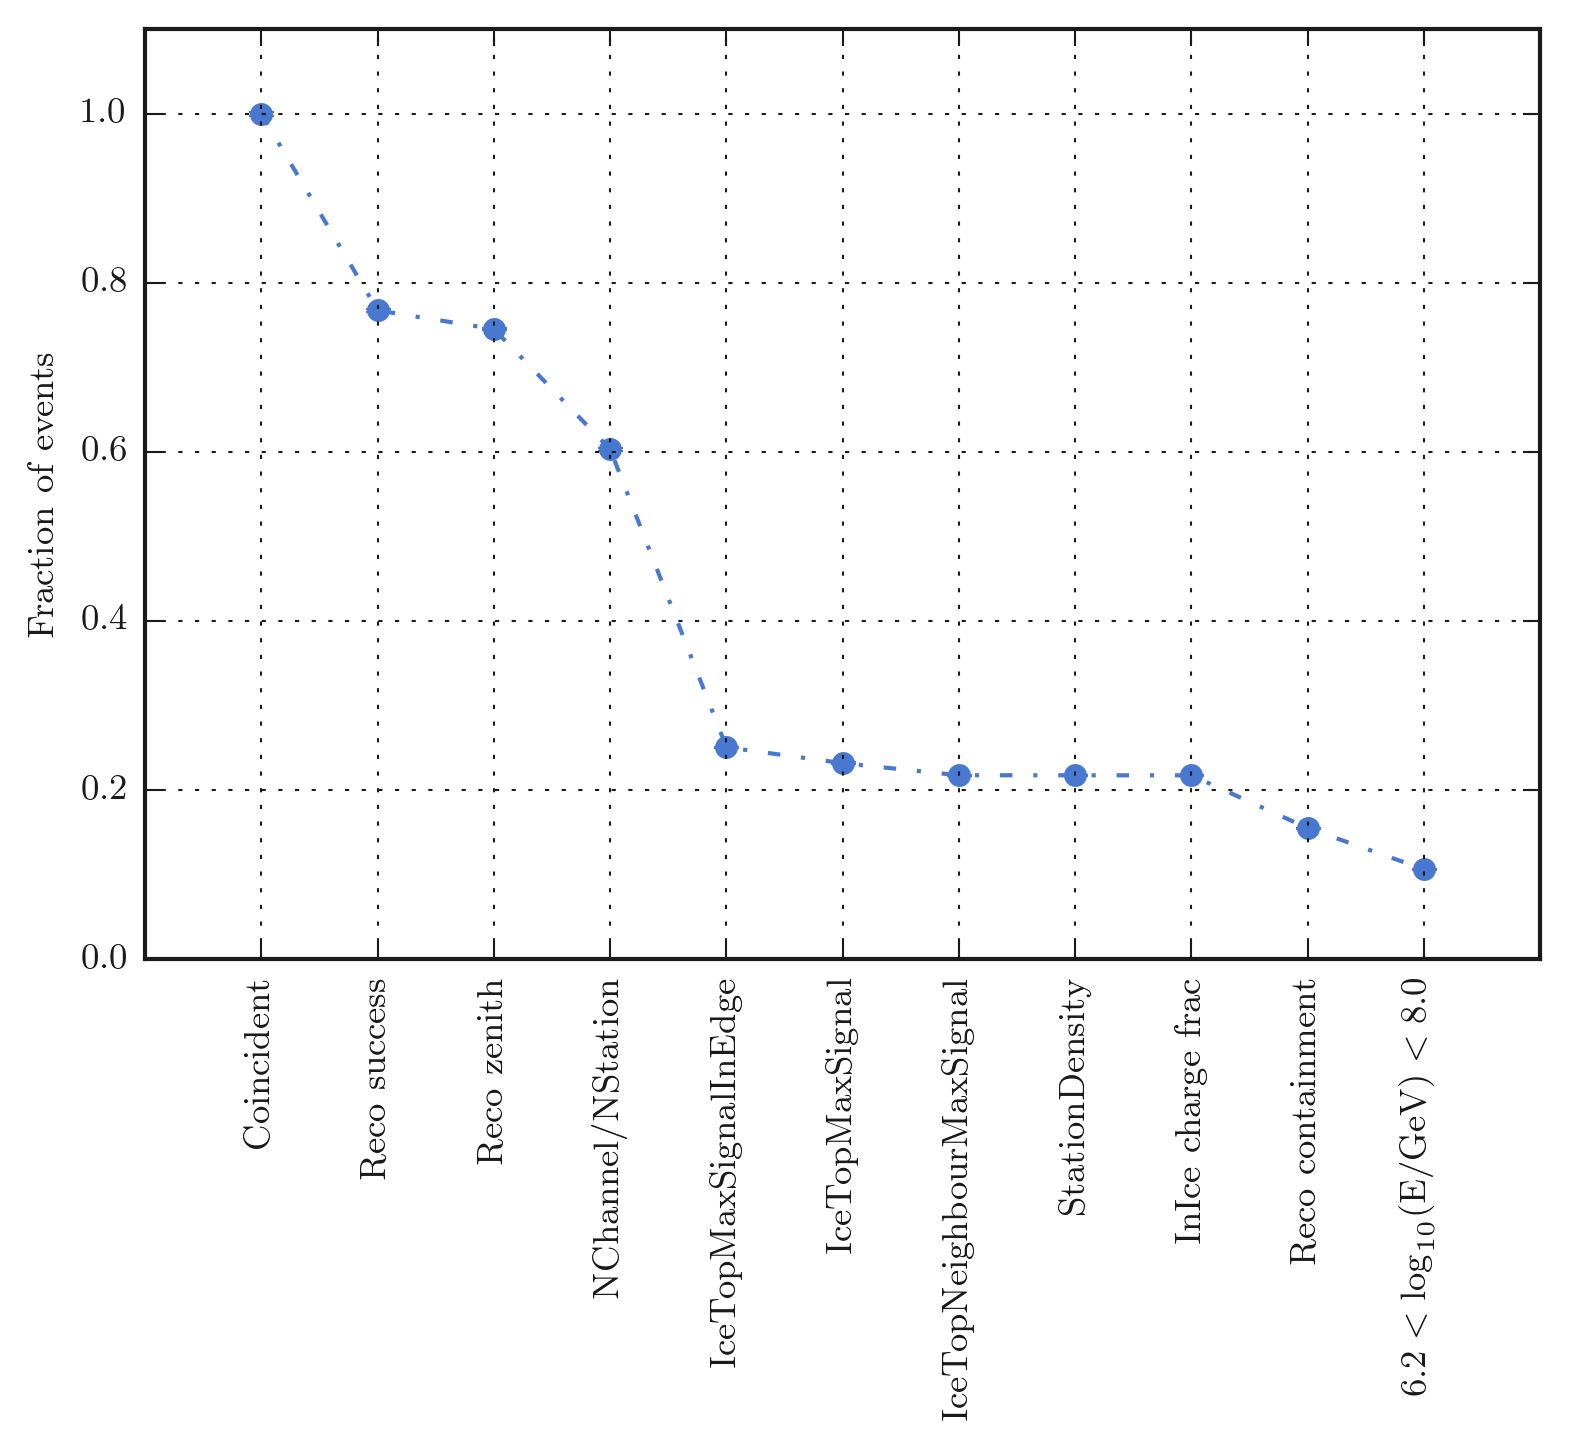

In [5]:
standard_cut_keys = ['LLHLF_reco_exists', 'LLHLF_zenith', 'num_hits_1_30', 'IceTopMaxSignalInEdge',
                     'IceTopMaxSignal', 'IceTopNeighbourMaxSignal', 
                     'StationDensity', 'max_qfrac_1_30', 'LLHLF_containment', 'energy_range']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IceTopMaxSignalInEdge',
          'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
          'StationDensity', 'InIce charge frac', 'Reco containment', '$6.2 < \log_{10}(\mathrm{E/GeV}) < 8.0$']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
n_tot = len(df)
n_tot_err = np.sqrt(len(df))
initial, initial_err = comp.ratio_error(
        n_tot, n_tot_err,
        n_tot, n_tot_err)

event_flow = [initial]
event_flow_err = [initial_err]
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    ratio, ratio_err = comp.ratio_error(
        len(df_cuts), np.sqrt(len(df_cuts)),
        n_tot, n_tot_err)
    event_flow.append(ratio)
    event_flow_err.append(ratio_err)
#     event_flow.append(len(df_cuts)/n_tot)
#     event_flow_err.append(np.sqrt(len(df_cuts))/n_tot)
    
fig, ax = plt.subplots()
x = range(len(standard_cut_keys)+1)
print(x)
print(event_flow)
ax.errorbar(x, event_flow, yerr=event_flow_err,
           marker='.', linestyle='-.')
ax.grid()
# ax.set_ylim([1e-1,1e5])
# ax.set_yscale("log", nonposy='clip')
# ax.set_xlabel('True IT Containment Fraction')
plt.xticks(x, ['Coincident'] + labels, rotation='vertical')
ax.set_ylabel('Fraction of events')
ax.set_xlim([-1, len(x)])
ax.set_ylim([0, 1.1])